## 1. Read File

In [127]:
import pandas as pd

df = pd.read_csv('data.csv', sep=';')
df.dropna(axis=0, how='any', inplace=True)                         # dropped NAs including rows with NULL sentiment
df.drop(['id', 'created_at'], axis=1, inplace=True)                # dropped irrelavent cols

In [128]:
df.head()

,text,sentiment
0,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,Net issuance increases to fund fiscal programs...,positive
3,RT @bentboolean: How much of Amazon's traffic ...,positive
4,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive


In [129]:
print(df.columns)
print(df.describe)

Index(['text', 'sentiment'], dtype='object')
<bound method NDFrame.describe of                                                    text sentiment
0     RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...  positive
1     #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...  negative
2     Net issuance increases to fund fiscal programs...  positive
3     RT @bentboolean: How much of Amazon's traffic ...  positive
4     $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...  positive
...                                                 ...       ...
1295  #stocks back from the recovery room: https://t...  positive
1296  RT @MacroCharts: Breadth – expanding last week...  positive
1297  RT @MawsonResource: Rompas-Rajapalot: A Big Ne...   neutral
1298  $AAPL $QQQ Top may now be in. https://t.co/iNK...  positive
1299  GLG Partners LP short position in HILTON FOOD ...  negative

[1300 rows x 2 columns]>


## 2. Preprocessing

In [130]:
# to lower case
df['text'] = df['text'].str.lower()
df

,text,sentiment
0,"rt @robertbeadles: yo💥\nenter to win 1,000 mon...",positive
1,#srilanka surcharge on fuel removed!\n⛽📉\nthe ...,negative
2,net issuance increases to fund fiscal programs...,positive
3,rt @bentboolean: how much of amazon's traffic ...,positive
4,$amd ryzen 4000 desktop cpus looking ‘great’ a...,positive
...,...,...
1295,#stocks back from the recovery room: https://t...,positive
1296,rt @macrocharts: breadth – expanding last week...,positive
1297,rt @mawsonresource: rompas-rajapalot: a big ne...,neutral
1298,$aapl $qqq top may now be in. https://t.co/ink...,positive


In [131]:
# keep only english letters, spaces, and numbers
valid_chars = 'abcdefghijklmnopqrstuvwxyz0123456789 '
df['text'] = df['text'].map(lambda x: ''.join([char for char in x 
                                               if char in valid_chars])
                           )
df

,text,sentiment
0,rt robertbeadles yoenter to win 1000 monarch t...,positive
1,srilanka surcharge on fuel removedthe surcharg...,negative
2,net issuance increases to fund fiscal programs...,positive
3,rt bentboolean how much of amazons traffic is ...,positive
4,amd ryzen 4000 desktop cpus looking great and ...,positive
...,...,...
1295,stocks back from the recovery room httpstco6hv...,positive
1296,rt macrocharts breadth expanding last weeks d...,positive
1297,rt mawsonresource rompasrajapalot a big new ca...,neutral
1298,aapl qqq top may now be in httpstcoinkwb0txus,positive


In [132]:
# tokenize - word count
from collections import Counter

all_text = ' '.join(df['text'])

words = all_text.split()
word_count = Counter(words)
words_sorted = word_count.most_common(len(words))
word_count = {w: i +1  for i, (w,c) in enumerate(words_sorted)}

word_count
##### to resolve: 1) urls 2) invalid words? 3) plural words ###########


{'the': 1,
 'rt': 2,
 'to': 3,
 'stocks': 4,
 'a': 5,
 'in': 6,
 'of': 7,
 'for': 8,
 'and': 9,
 'on': 10,
 'is': 11,
 'spx': 12,
 'aapl': 13,
 'spy': 14,
 'amzn': 15,
 'this': 16,
 'at': 17,
 'trading': 18,
 'fb': 19,
 'with': 20,
 'i': 21,
 'it': 22,
 'are': 23,
 'be': 24,
 'by': 25,
 'stock': 26,
 'from': 27,
 'as': 28,
 'stockmarket': 29,
 'you': 30,
 'that': 31,
 'investing': 32,
 'tsla': 33,
 'up': 34,
 'market': 35,
 'amp': 36,
 'msft': 37,
 'not': 38,
 'esf': 39,
 'have': 40,
 'qqq': 41,
 'more': 42,
 'has': 43,
 'earnings': 44,
 'but': 45,
 'if': 46,
 'now': 47,
 'will': 48,
 'nflx': 49,
 'we': 50,
 'short': 51,
 'markets': 52,
 'my': 53,
 'buy': 54,
 'its': 55,
 'all': 56,
 'like': 57,
 'new': 58,
 'was': 59,
 'today': 60,
 'out': 61,
 'week': 62,
 'some': 63,
 'us': 64,
 'about': 65,
 'our': 66,
 'time': 67,
 'inc': 68,
 '2020': 69,
 'chart': 70,
 'price': 71,
 'free': 72,
 'one': 73,
 'can': 74,
 'an': 75,
 'just': 76,
 'target': 77,
 'jpm': 78,
 'or': 79,
 'what': 80,
 'yo

In [133]:
# tokenize - encode words
df['text'] = df['text'].map(lambda x: x.split())
df['text'] = df['text'].map(lambda x: [word_count[word] for word in x])
df

,text,sentiment
0,"[2, 2424, 2425, 3, 458, 520, 2426, 2427, 26, 3...",positive
1,"[2430, 1471, 10, 2431, 2432, 1471, 7, 2433, 24...",negative
2,"[522, 2447, 401, 3, 598, 887, 2448, 309, 1124,...",positive
3,"[2, 2454, 106, 233, 7, 2455, 1472, 11, 2456, 2...",positive
4,"[167, 2460, 1473, 2461, 2462, 271, 168, 9, 10,...",positive
...,...,...
1295,"[4, 110, 27, 1, 467, 2150, 7911, 1016, 501, 79...",positive
1296,"[2, 1459, 2380, 2193, 96, 372, 7915, 134, 1017...",positive
1297,"[2, 7918, 7919, 5, 119, 58, 1594, 7920, 282, 7...",neutral
1298,"[13, 41, 142, 133, 47, 24, 6, 7927]",positive


In [134]:
# tokenize - encode labels
sent_dict = {'positive':1, 'neutral':0, 'negative': -1}
df['sentiment'] = df['sentiment'].map(lambda x: sent_dict[x])
df

,text,sentiment
0,"[2, 2424, 2425, 3, 458, 520, 2426, 2427, 26, 3...",1
1,"[2430, 1471, 10, 2431, 2432, 1471, 7, 2433, 24...",-1
2,"[522, 2447, 401, 3, 598, 887, 2448, 309, 1124,...",1
3,"[2, 2454, 106, 233, 7, 2455, 1472, 11, 2456, 2...",1
4,"[167, 2460, 1473, 2461, 2462, 271, 168, 9, 10,...",1
...,...,...
1295,"[4, 110, 27, 1, 467, 2150, 7911, 1016, 501, 79...",1
1296,"[2, 1459, 2380, 2193, 96, 372, 7915, 134, 1017...",1
1297,"[2, 7918, 7919, 5, 119, 58, 1594, 7920, 282, 7...",0
1298,"[13, 41, 142, 133, 47, 24, 6, 7927]",1


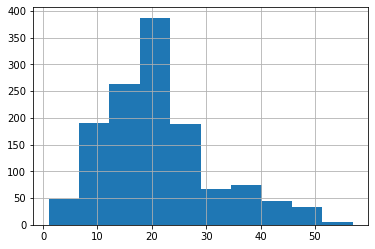

In [135]:
# distribution of text lengths
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df['length'] = df['text'].str.len()
df['length'].hist()
plt.show()


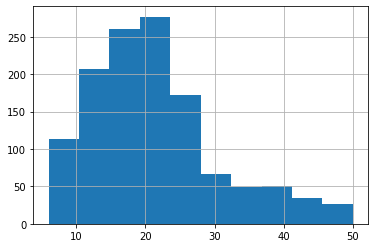

,text,sentiment,length
0,"[2, 2424, 2425, 3, 458, 520, 2426, 2427, 26, 3...",1,21
1,"[2430, 1471, 10, 2431, 2432, 1471, 7, 2433, 24...",-1,37
2,"[522, 2447, 401, 3, 598, 887, 2448, 309, 1124,...",1,39
3,"[2, 2454, 106, 233, 7, 2455, 1472, 11, 2456, 2...",1,24
4,"[167, 2460, 1473, 2461, 2462, 271, 168, 9, 10,...",1,19
...,...,...,...
1295,"[4, 110, 27, 1, 467, 2150, 7911, 1016, 501, 79...",1,15
1296,"[2, 1459, 2380, 2193, 96, 372, 7915, 134, 1017...",1,20
1297,"[2, 7918, 7919, 5, 119, 58, 1594, 7920, 282, 7...",0,21
1298,"[13, 41, 142, 133, 47, 24, 6, 7927]",1,8


In [136]:
# new distribution after dropping outliers (tweet length > 50 or < 5)
max_len = 50
min_len = 6
df = df[(df['length'] <= max_len) & (df['length'] >= min_len)]
df['length'].hist()
plt.show()
df

In [137]:
# pad 0s to ensure same length
import more_itertools as mit
import numpy as np

df['text'] = df['text'].map(lambda x: np.array(list(mit.padded(x, 0, max_len))))
df['length'] = df['text'].str.len()
df

########### to resolve: the warning (probably deepcopy) ##########

C:\Users\kevin\AppData\Local\Temp\ipykernel_7748\751274324.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].map(lambda x: np.array(list(mit.padded(x, 0, max_len))))
C:\Users\kevin\AppData\Local\Temp\ipykernel_7748\751274324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['text'].str.len()


,text,sentiment,length
0,"[2, 2424, 2425, 3, 458, 520, 2426, 2427, 26, 3...",1,50
1,"[2430, 1471, 10, 2431, 2432, 1471, 7, 2433, 24...",-1,50
2,"[522, 2447, 401, 3, 598, 887, 2448, 309, 1124,...",1,50
3,"[2, 2454, 106, 233, 7, 2455, 1472, 11, 2456, 2...",1,50
4,"[167, 2460, 1473, 2461, 2462, 271, 168, 9, 10,...",1,50
...,...,...,...
1295,"[4, 110, 27, 1, 467, 2150, 7911, 1016, 501, 79...",1,50
1296,"[2, 1459, 2380, 2193, 96, 372, 7915, 134, 1017...",1,50
1297,"[2, 7918, 7919, 5, 119, 58, 1594, 7920, 282, 7...",0,50
1298,"[13, 41, 142, 133, 47, 24, 6, 7927, 0, 0, 0, 0...",1,50


## 3. Train Test Split & Data Loader

In [138]:
# train test split - 60% train, 20% valid, 20% test
from sklearn.model_selection import train_test_split
Y = df['sentiment']
X = df['text']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)                # train test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)     # train valid split

X_train = np.stack(X_train.to_numpy())
X_test = np.stack(X_test.to_numpy())
X_val = np.stack(X_val.to_numpy())
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_val = y_val.to_numpy()


In [139]:
# numpy to dataloader
import torch
from torch.utils.data import DataLoader, TensorDataset

# numpy to TensorDateset
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

batch_size = 50
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)


## 4. Model Creation

In [140]:
# define model 

import torch.nn as nn

class LSTM_Classifier(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, n_layers, n_words, output_size, drop_prob=0.5):

        super().__init__()
        self.embedding = nn.Embedding(n_words, embedding_dim)
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.output_size = output_size
        self.dropout = nn.Dropout(drop_prob)
        self.full_connected = nn.Linear(hidden_dim, output_size)


    def forward(self, sentence, hidden):
        
        embeds = self.embedding(sentence)
        batch_size = sentence.size(0)
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        output = self.dropout(lstm_out)
        output = nn.Sigmoid(self.full_connected(out))
        output = output.view(batch_size, -1)
        output = output[:, -1]
        
        return output, hidden
    
    
    def init_hidden(self, batch_size):

        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()
                 )
        
        return hidden
        

In [141]:
# Instantiate model
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
model = LSTM_Classifier(1 + len(word_count), output_size, embedding_dim, hidden_dim, n_layers)

model

LSTM_Classifier(
  (embedding): Embedding(256, 7932)
  (lstm): LSTM(7932, 1, num_layers=400, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (full_connected): Linear(in_features=1, out_features=2, bias=True)
)

In [142]:
# add new word to dict
import numpy as np

# convert sentence to integers
def prepare_sequence(seq, word_count):
    for w in seq:
        if w not in word_count:
            word_count[w] = 1
    ints = [word_count[w] for w in seq]
    ints = np.array(ints)
    
    return torch.from_numpy(ints)
